<a href="https://colab.research.google.com/github/thakur1899/Colab/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.metrics import *
import matplotlib.pyplot as plt

**Creating the Data**

In [0]:
path = untar_data(URLs.MNIST)

In [4]:
path

PosixPath('/root/.fastai/data/mnist_png')

In [0]:
data= ImageDataBunch.from_folder(path,train='training',valid='testing', size=32)

In [0]:
# ImageDataBunch.from_folder??


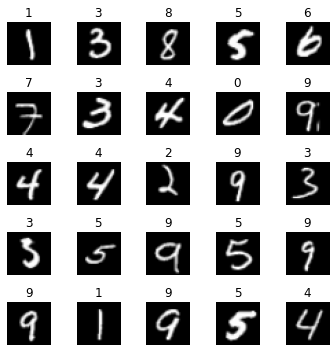

In [6]:
data.show_batch(row=3,figsize=(5,5))

In [7]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

**Training the Resnet34**

In [0]:
model_34 = cnn_learner(data, models.resnet34, metrics=error_rate)  #metrics can be accuracy or error_rate

In [9]:
model_34.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.564069,0.373827,0.117400,01:26
1,0.240627,0.144054,0.042400,01:26
2,0.142840,0.083291,0.026800,01:28
3,0.109926,0.067432,0.020300,01:28
4,0.099406,0.063740,0.019000,01:28


In [0]:
model_34.save('stage-1-resnet34')

**Interpretation from classifier**

In [11]:
intrp = ClassificationInterpretation.from_learner(model_34)

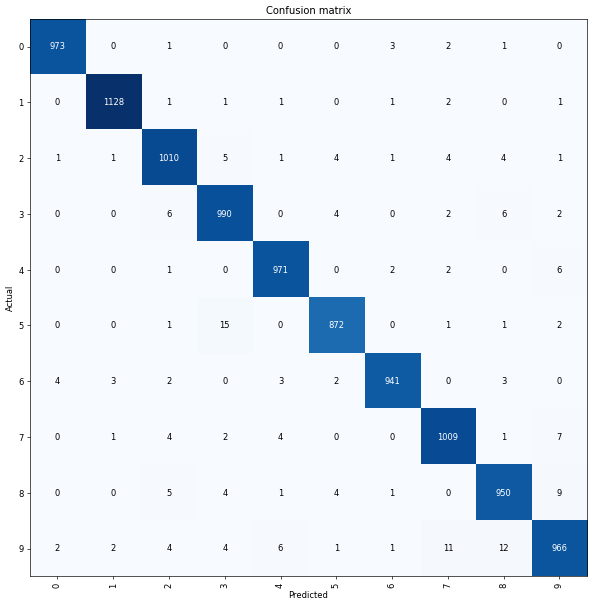

In [12]:
intrp.plot_confusion_matrix(figsize=(10,10),dpi=60)

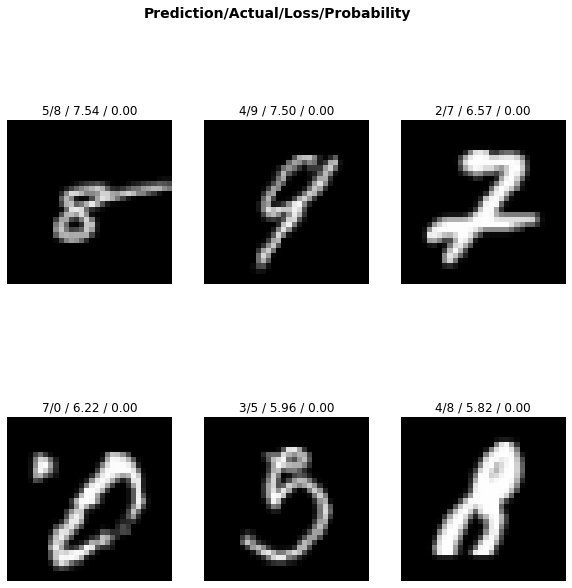

In [13]:
intrp.plot_top_losses(6,figsize=(10,10))

In [14]:
intrp.most_confused(min_val=2)

[('5', '3', 15),
 ('9', '8', 12),
 ('9', '7', 11),
 ('8', '9', 9),
 ('7', '9', 7),
 ('3', '2', 6),
 ('3', '8', 6),
 ('4', '9', 6),
 ('9', '4', 6),
 ('2', '3', 5),
 ('8', '2', 5),
 ('2', '5', 4),
 ('2', '7', 4),
 ('2', '8', 4),
 ('3', '5', 4),
 ('6', '0', 4),
 ('7', '2', 4),
 ('7', '4', 4),
 ('8', '3', 4),
 ('8', '5', 4),
 ('9', '2', 4),
 ('9', '3', 4),
 ('0', '6', 3),
 ('6', '1', 3),
 ('6', '4', 3),
 ('6', '8', 3),
 ('0', '7', 2),
 ('1', '7', 2),
 ('3', '7', 2),
 ('3', '9', 2),
 ('4', '6', 2),
 ('4', '7', 2),
 ('5', '9', 2),
 ('6', '2', 2),
 ('6', '5', 2),
 ('7', '3', 2),
 ('9', '0', 2),
 ('9', '1', 2)]

**Fine Tuning**

In [15]:
model_34.unfreeze()

model_34.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.085616,0.065294,0.020000,01:40
1,0.069354,0.039973,0.012900,01:40
2,0.036876,0.022116,0.006300,01:40
3,0.021940,0.013620,0.004100,01:37
4,0.008157,0.013083,0.004100,01:38


In [16]:
model_34.load('stage-1-resnet34')
model_34.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


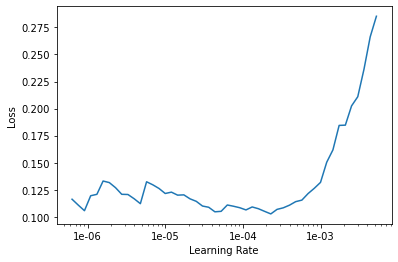

In [17]:
model_34.recorder.plot()

In [18]:
model_34.fit_one_cycle(5, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.085964,0.035376,0.011900,01:39
1,0.051840,0.027721,0.009400,01:38
2,0.028953,0.018834,0.005400,01:37
3,0.012546,0.012942,0.003800,01:38
4,0.003944,0.012988,0.003600,01:38


as you can see my error_rate is 0.0036 hence it is a considerable rate.